In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [2]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!

G = 6.6738e-8
rgas = 7.07e16                                     # The initial radius of the cloud in cm
rho0 = 1.35e-18                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

UnitDensity_in_cgs = UnitMass_in_g / unitLength_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')


unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 5.630894306601103e-18 g/cm^3
unitVelocity_in_cm_per_s = 39103.2 cm/s


In [5]:
j = 495

filz = np.sort(glob.glob('./Outputs_a_0.5_B_0.04_mine_Exact_h/*.pkl'))

In [6]:
with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
print(r.shape)

print('h = ', np.sort(h))

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
rho = data['rho']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

(16384, 3)
h =  [0.00820846 0.00821633 0.00824644 ... 0.65324141 0.65656391 0.66602348]
rho =  [9.59631762e-22 9.93873555e-22 1.00861438e-21 ... 1.01743043e-15
 1.04967286e-15 1.04990452e-15]


## Selecting particles in a thin shell parallel to the x-y plane

In [7]:
delta = 0.02

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

rx = x[nz]
ry = y[nz]
rz = z[nz]

vt = v[nz]

2013


(-1.0, 1.0)

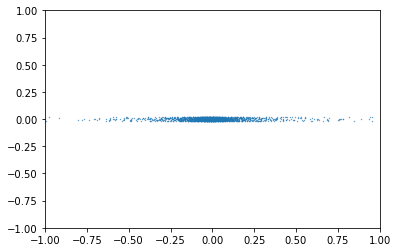

In [8]:
plt.scatter(rx, rz, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [9]:
radius = (rx*rx + ry*ry + rz*rz)**0.5

vr = (vt[:, 0]*rx + vt[:, 1]*ry + vt[:, 2]*rz)/radius

In [10]:
np.sort(vr)

array([-0.73158777, -0.71079284, -0.68731694, ...,  1.16559386,
        1.21073242,  1.41882032])

In [11]:
logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

In [12]:
res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(vr[nx])])

res = np.array(res)

/home/pc/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pc/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
R = res[:, 0] * unitLength_in_cm
vr = res[:, 1] * unitVelocity_in_cm_per_s

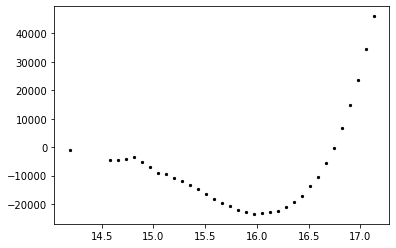

In [14]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');

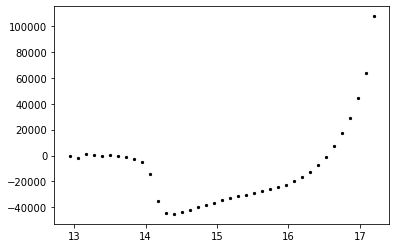

In [76]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');

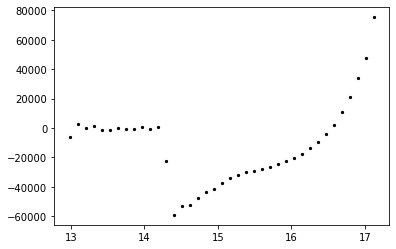

In [48]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');

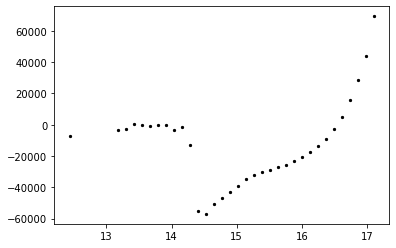

In [21]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');